In [4]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [6]:
from keras.datasets import mnist

In [7]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

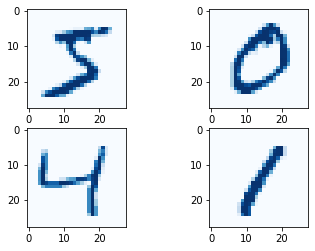

In [13]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('Blues'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('Blues'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('Blues'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('Blues'))

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'train samples')

60000 train samples
10000 train samples


In [17]:
num_classes = 10 # as we have 10 classes for 10 numbers (0-9)

In [18]:
# convert a class vector to binary class matrix
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
y_train.shape

(60000, 10)

In [23]:
# Create Neuron Unit with 1 hidden layer and 1 output layer
# Hidden layer: 3 Neuron with ReLU activation function
# Output layer: 10 Neuron corresponding to 10 classes with Softmax activation function
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(784,)))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 2355      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.1), metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train)

Epoch 1/1
60000/60000 [==============================] - 2s 27us/step - loss: 1.5708 - accuracy: 0.4582


In [28]:
# Evaluate the model
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 17us/step


In [29]:
print("Test loss : ", score[0])

Test loss :  1.1908939912796022


In [30]:
print("Test accuracy : ", score[1])

Test accuracy :  0.6480000019073486


In [32]:
# Make prediction
y_pred = model.predict(x_test)[0]
classes = np.argmax(y_pred)

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Predict= 7


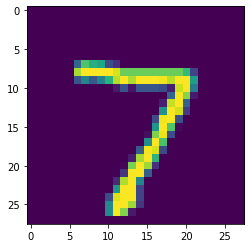

In [34]:
print("Predict= " + str(classes))
plt.imshow(x_test[0])